In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

IMPORTING DATA



In [2]:
car_dataset = pd.read_csv('car_data.csv')
scaler = StandardScaler()

In [5]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#checking rows and columns
car_dataset.shape

(301, 9)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#checking number of missing values (IMP)
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [12]:
#these values are in text data, machine cant understand text therefore we need to convert to numeric IMP)

In [14]:
#petrol to 0, diesel to 1, cng to 2
#dealer 0, individual 1
#manual 0, automatic 1

In [9]:
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)
car_dataset.infer_objects(copy=False)

C:\Users\YASH\AppData\Local\Temp\ipykernel_5860\2559288030.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
C:\Users\YASH\AppData\Local\Temp\ipykernel_5860\2559288030.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
C:\Users\YASH\AppData\Local\Temp\ipykernel_5860\2559288030.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting data into training and test
target: selling price

In [10]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']
X_scaled = scaler.fit_transform(X)

In [10]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [21]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.15, random_state=2)

MODEL TRAINING


LINEAR REGRESISION


In [29]:
lin_reg_model = LinearRegression()

In [30]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

EVALUATION


In [31]:
prediction_train_lin = lin_reg_model.predict(X_train)

In [32]:
#R Square Error
error_score_lin = metrics.r2_score(prediction_train_lin, Y_train)
print(error_score_lin)

0.8620978781828588


Visualize Actual and Predicted Prices

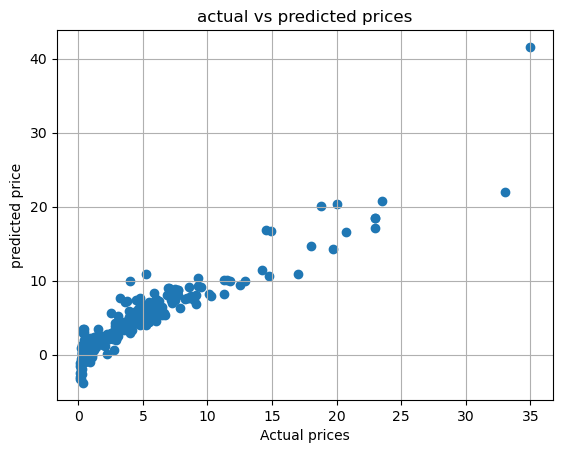

In [33]:
plt.scatter(Y_train, prediction_train_lin)
plt.xlabel('Actual prices')
plt.ylabel('predicted price')
plt.title('actual vs predicted prices')
plt.grid(True)
plt.show()

TEST DATA EVALUATION


In [34]:
test_data_prediction = lin_reg_model.predict(X_test)
test_error_score_lin = metrics.r2_score(test_data_prediction, Y_test)

In [35]:
print(test_error_score_lin)

0.8446615330299407


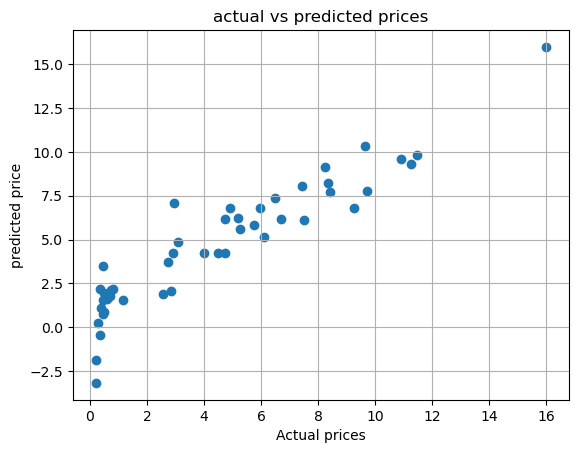

In [36]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('predicted price')
plt.title('actual vs predicted prices')
plt.grid(True)
plt.show()

LASSO REGRESSION


In [20]:
lasso_model = Lasso()
alphas = np.logspace(-4, 2, 50)
params = {'alpha': alphas}

In [21]:
grid = GridSearchCV(lasso_model, params, scoring='r2', cv=5)
grid.fit(X_train, Y_train)
print("Best alpha:", grid.best_params_)

Best alpha: {'alpha': 0.15264179671752334}


In [22]:
best_alpha = grid.best_params_['alpha']
final_lasso = Lasso(alpha = best_alpha)
final_lasso.fit(X_train, Y_train)

Lasso(alpha=0.15264179671752334)

In [23]:
pred_lasso = final_lasso.predict(X_test)
pred_lasso_score = r2_score(Y_test, pred_lasso)
print("Lasso R^2 score:", pred_lasso_score)

Lasso R^2 score: 0.8763098463411747


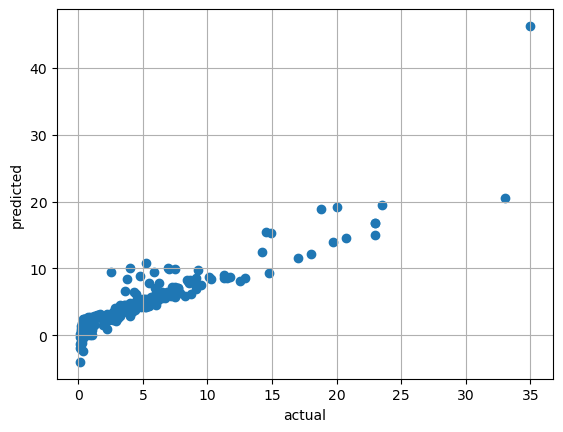

In [43]:
#LASSO
plt.scatter(Y_train, test_prediction_lasso)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.grid(True)
plt.show()

LASSO TEST DATA


In [46]:
test_prediction = lasso_model.predict(X_test)
error_test_lasso = metrics.r2_score(Y_test, test_prediction)
print(error_test_lasso)

0.8940142482159141
